----- 최종 분석 테이블 불러오기 성공 -----


,Topic,Count,Keywords,Store A,Store B,Store C
0,0,30,"구이, 일본, 볶음밥, 범계, 웨이팅",10.0,6.7,83.3
1,1,16,"이자카야, 범계, 이태원, 술집, 사장",31.2,68.8,0.0
2,2,13,"친절, 직원, 음식, 감사, 최고",0.0,69.2,30.8
3,3,11,"범계, 술집, 안주, 분위기, 맛집",90.9,9.1,0.0
4,4,8,"안주, 오늘, 분위기, 만족, 저녁",0.0,37.5,62.5
5,5,7,"범계, 술집, 꼬치, 모찌리도후, 맛집",100.0,0.0,0.0
6,6,4,"친구, 웨이팅, 대기, 시간, 남자",0.0,0.0,100.0
7,7,3,"친구, 안주, 범계, 술집, 최고",33.3,66.7,0.0




----- [논문 결과 2] 전략 포지셔닝 맵 생성 -----
X-axis: Topic Share (%) related to 'Grilled(Food)' (Topic 0)
Y-axis: Topic Share (%) related to 'Japanese(Cuisine)' (Topic 1)


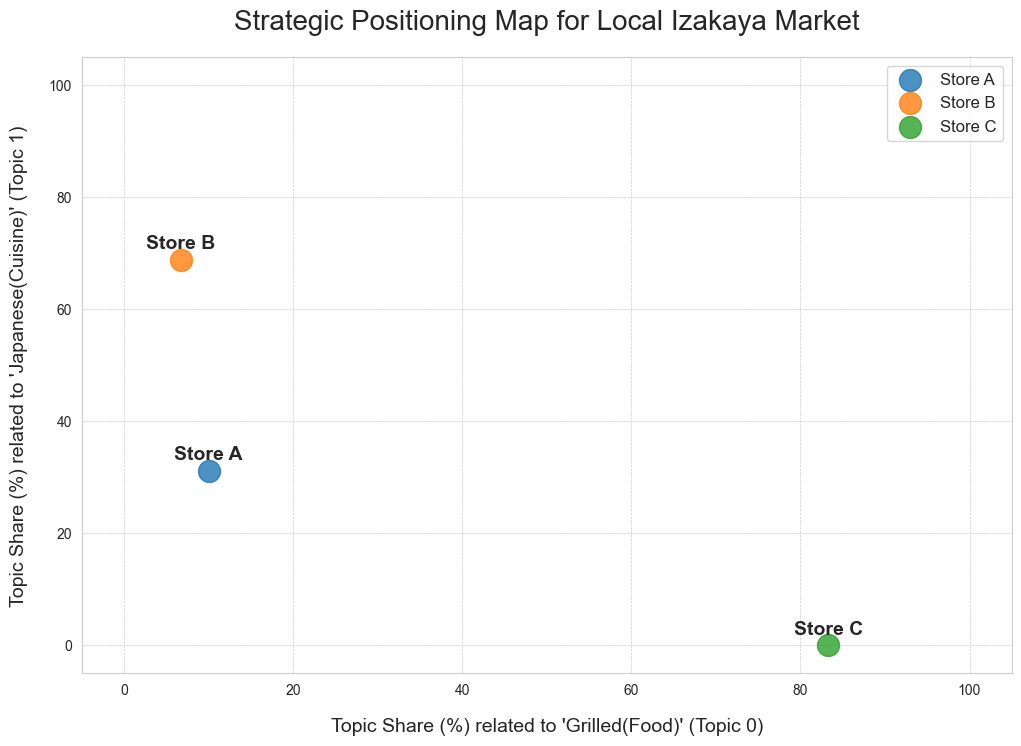


✅ 전략 포지셔닝 맵이 생성되어 '../results/positioning_map_final.png' 파일로 저장되었습니다.


----- [논문 결과 3] LLM용 페르소나 프롬프트 생성 -----

===== [ Topic 0 페르소나 생성용 프롬프트 ] =====

당신은 전문 마케팅 분석가입니다. 아래 데이터를 바탕으로 고객 페르소나를 1명 만들어주세요.
페르소나의 [이름, 나이, 직업, 특징], [이 가게들을 찾는 핵심 동기(Goals)], 그리고 [불편해하는 점(Pain Points)]을 포함하여 상세한 프로필을 자연스러운 줄글 형태로 작성해주세요.
---
[데이터]
- 페르소나 유형 (주제): Topic 0
- 핵심 관심사 키워드: 구이, 일본, 볶음밥, 범계, 웨이팅
- 이 유형의 고객들이 주로 방문하는 가게: Store C
- 가게별 언급량 점유율:
  - Store A: 10.0%
  - Store B: 6.7%
  - Store C: 83.3%
---

===== [ Topic 1 페르소나 생성용 프롬프트 ] =====

당신은 전문 마케팅 분석가입니다. 아래 데이터를 바탕으로 고객 페르소나를 1명 만들어주세요.
페르소나의 [이름, 나이, 직업, 특징], [이 가게들을 찾는 핵심 동기(Goals)], 그리고 [불편해하는 점(Pain Points)]을 포함하여 상세한 프로필을 자연스러운 줄글 형태로 작성해주세요.
---
[데이터]
- 페르소나 유형 (주제): Topic 1
- 핵심 관심사 키워드: 이자카야, 범계, 이태원, 술집, 사장
- 이 유형의 고객들이 주로 방문하는 가게: Store B
- 가게별 언급량 점유율:
  - Store A: 31.2%
  - Store B: 68.8%
  - Store C: 0.0%
---

===== [ Topic 2 페르소나 생성용 프롬프트 ] =====

당신은 전문 마케팅 분석가입니다. 아래 데이터를 바탕으로 고객 페르소나를 1명 만들어주세요.
페르소나의 [이름, 나이, 직업, 특징], [이 가게들

In [1]:
# ======================================================================
# ⚙️ [연구 5단계] 결과 시각화 및 페르소나 생성
# ======================================================================
# 목표: 4단계에서 만든 분석표를 바탕으로, '전략 포지셔닝 맵'을 시각화하고
#      각 고객 그룹을 대표하는 '페르소나 프로필' 생성용 프롬프트를 만듭니다.
# ======================================================================

# 1. 라이브러리 임포트 및 분석 결과 로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 💡 [핵심 수정] 더 이상 복잡한 한글 폰트 설정이 필요 없습니다.
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

try:
    # 4단계에서 생성된 최종 분석 테이블을 불러옵니다.
    df_analysis = pd.read_csv('../results/competitive_analysis_final.csv')
    print("----- 최종 분석 테이블 불러오기 성공 -----")
    display(df_analysis)
except FileNotFoundError:
    print("오류: '../results/competitive_analysis_final.csv' 파일을 찾을 수 없습니다.")
    print("04_competitive_analysis_final.ipynb를 먼저 실행했는지 확인하세요.")
    exit()

# 2. 전략 포지셔닝 맵 시각화
print("\n\n----- [논문 결과 2] 전략 포지셔닝 맵 생성 -----")

# 💡 [핵심 수정] 그래프 축에 사용할 주요 키워드에 대한 영문 번역 사전을 정의합니다.
#      향후 다른 키워드를 축으로 사용하고 싶다면 이 사전에 추가하면 됩니다.
keyword_translation = {
    '범계': 'Beomgye(Location)',
    '이자카야': 'Japanese(Cuisine)',
    '술집': 'Bar(Type)',
    '친절': 'Service(Kindness)',
    '구이': 'Grilled(Food)',
    '친구': 'Friends(Group)',
    '시간': 'Time(Waiting)',
    '분위기': 'Mood(ambience)',
    '음식': 'Food(Cuisine)',
    '가성비': 'Cost-effectiveness(price)'
}


# 💡 [연구자 노트] 분석가가 토픽의 키워드를 보고 각 축의 의미를 직접 정의합니다.
try:
    AXIS_X_TOPIC = 0  # 예: '분위기/감성' 관련 토픽 번호
    AXIS_Y_TOPIC = 1  # 예: '음식/가성비' 관련 토픽 번호

    # 한글 키워드를 가져온 뒤, 번역 사전을 사용하여 영문으로 변환합니다.
    axis_x_keyword_ko = df_analysis[df_analysis['Topic'] == AXIS_X_TOPIC]['Keywords'].values[0].split(',')[0]
    axis_y_keyword_ko = df_analysis[df_analysis['Topic'] == AXIS_Y_TOPIC]['Keywords'].values[0].split(',')[0]
    
    # 사전에 키워드가 있으면 영문으로, 없으면 원본 한글로 표시됩니다.
    axis_x_keyword_en = keyword_translation.get(axis_x_keyword_ko, axis_x_keyword_ko)
    axis_y_keyword_en = keyword_translation.get(axis_y_keyword_ko, axis_y_keyword_ko)
    
    axis_x_label = f"Topic Share (%) related to '{axis_x_keyword_en}' (Topic {AXIS_X_TOPIC})"
    axis_y_label = f"Topic Share (%) related to '{axis_y_keyword_en}' (Topic {AXIS_Y_TOPIC})"
    print(f"X-axis: {axis_x_label}")
    print(f"Y-axis: {axis_y_label}")

    stores = ['Store A', 'Store B', 'Store C']
    positions = {}
    for store in stores:
        pos_x = df_analysis[df_analysis['Topic'] == AXIS_X_TOPIC][store].values[0]
        pos_y = df_analysis[df_analysis['Topic'] == AXIS_Y_TOPIC][store].values[0]
        positions[store] = (pos_x, pos_y)

    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    for store, pos in positions.items():
        plt.scatter(pos[0], pos[1], s=250, label=store, alpha=0.8)
        plt.text(pos[0], pos[1] + 2, store, fontsize=14, ha='center', fontweight='bold')

    plt.title('Strategic Positioning Map for Local Izakaya Market', fontsize=20, pad=20)
    plt.xlabel(axis_x_label, fontsize=14, labelpad=15)
    plt.ylabel(axis_y_label, fontsize=14, labelpad=15)
    plt.xlim(-5, 105)
    plt.ylim(-5, 105)
    plt.legend(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    plt.savefig('../results/positioning_map_final.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✅ 전략 포지셔닝 맵이 생성되어 '../results/positioning_map_final.png' 파일로 저장되었습니다.")

except (KeyError, IndexError):
    print("\n❌ 오류: 포지셔닝 맵 생성에 실패했습니다. AXIS_X_TOPIC 또는 AXIS_Y_TOPIC 번호를 확인해주세요.")

# 3. LLM을 위한 페르소나 프로필 프롬프트 생성 (기존과 동일)
print("\n\n----- [논문 결과 3] LLM용 페르소나 프롬프트 생성 -----")

all_prompts = []
def generate_persona_prompt(topic_data):
    share_columns = ['Store A', 'Store B', 'Store C']
    main_store = topic_data[share_columns].idxmax()
    prompt = f"""
당신은 전문 마케팅 분석가입니다. 아래 데이터를 바탕으로 고객 페르소나를 1명 만들어주세요.
페르소나의 [이름, 나이, 직업, 특징], [이 가게들을 찾는 핵심 동기(Goals)], 그리고 [불편해하는 점(Pain Points)]을 포함하여 상세한 프로필을 자연스러운 줄글 형태로 작성해주세요.
---
[데이터]
- 페르소나 유형 (주제): Topic {topic_data['Topic']}
- 핵심 관심사 키워드: {topic_data['Keywords']}
- 이 유형의 고객들이 주로 방문하는 가게: {main_store}
- 가게별 언급량 점유율:
  - Store A: {topic_data['Store A']}%
  - Store B: {topic_data['Store B']}%
  - Store C: {topic_data['Store C']}%
---"""
    return prompt

for index, row in df_analysis.iterrows():
    persona_prompt = generate_persona_prompt(row)
    print(f"\n===== [ Topic {int(row['Topic'])} 페르소나 생성용 프롬프트 ] =====")
    print(persona_prompt)
    all_prompts.append({'Topic': int(row['Topic']), 'Prompt': persona_prompt})

prompts_df = pd.DataFrame(all_prompts)
prompts_df.to_csv('../results/persona_prompts.csv', index=False, encoding='utf-8-sig')

print("\n\n✅ 모든 토픽에 대한 페르소나 프롬프트 생성이 완료되어 '../results/persona_prompts.csv' 파일로 저장했습니다.")

